In [ ]:
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error #metrics

In [ ]:
data1 = pd.read_csv('/content/hotel_details.csv')
data1.head()

,hotel_id,city,country,stars,hotel_rating
0,3202221,Rio de Janeiro,Brazil,0,\N
1,3826522,Hanoi,Vietnam,0,88.8
2,5433480,Rio de Janeiro,Brazil,0,81.66
3,6100572,Miami,USA,4,84.93
4,41209,Stockholm,Sweden,4,81.93


In [ ]:
data2 = pd.read_csv('/content/hotel_metrics.csv')
data2.head()

,date_ymd,hotel_id,impression_count,click_count,booking_count,avg_cpc,avg_clicked_price,avg_length_of_stay,avg_time_to_travel
0,20190802,7940,1931,16,0,0.93,168.87,1.63,23.25
1,20190810,7940,931,27,0,1.46,157.94,1.70,22.22
2,20190801,7940,1254,27,1,1.15,194.48,1.78,18.52
3,20190807,7940,1614,36,0,1.19,170.31,2.06,23.50
4,20190806,7940,1748,27,0,1.26,170.61,1.70,21.00


Merging the data sets based on hotel_id

In [ ]:
data = pd.merge(data1,data2, on='hotel_id')
data.head()

,hotel_id,city,country,stars,hotel_rating,date_ymd,impression_count,click_count,booking_count,avg_cpc,avg_clicked_price,avg_length_of_stay,avg_time_to_travel
0,3202221,Rio de Janeiro,Brazil,0,\N,20190808,1,1,0,0.27,40.66,2.0,57.0
1,3202221,Rio de Janeiro,Brazil,0,\N,20190802,1,1,0,0.30,42.58,1.0,8.0
2,3826522,Hanoi,Vietnam,0,88.8,20190802,1,1,0,0.64,37.26,1.0,23.0
3,3826522,Hanoi,Vietnam,0,88.8,20190804,1,1,0,0.63,41.63,5.0,70.0
4,5433480,Rio de Janeiro,Brazil,0,81.66,20190808,2,1,0,0.66,41.49,1.0,8.0


In [ ]:
data = data.drop('country' , axis = 1)



In [ ]:
data.head()

,hotel_id,city,stars,hotel_rating,date_ymd,impression_count,click_count,booking_count,avg_cpc,avg_clicked_price,avg_length_of_stay,avg_time_to_travel
0,3202221,Rio de Janeiro,0,\N,20190808,1,1,0,0.27,40.66,2.0,57.0
1,3202221,Rio de Janeiro,0,\N,20190802,1,1,0,0.30,42.58,1.0,8.0
2,3826522,Hanoi,0,88.8,20190802,1,1,0,0.64,37.26,1.0,23.0
3,3826522,Hanoi,0,88.8,20190804,1,1,0,0.63,41.63,5.0,70.0
4,5433480,Rio de Janeiro,0,81.66,20190808,2,1,0,0.66,41.49,1.0,8.0


Data Pre Processing

In [ ]:
data.isna().sum()

hotel_id              0
city                  0
stars                 0
hotel_rating          0
date_ymd              0
impression_count      0
click_count           0
booking_count         0
avg_cpc               0
avg_clicked_price     0
avg_length_of_stay    0
avg_time_to_travel    0
dtype: int64

In [ ]:
data['city'].unique()

array(['Rio de Janeiro', 'Hanoi', 'Miami', 'Stockholm', 'New York',
       'Los Angeles', 'unknown'], dtype=object)

In [ ]:
# taking unknown city names into new dataframe
unknow_data = pd.DataFrame(data[data['city'] == 'unknown'])

In [ ]:
unknow_data.head()

,hotel_id,city,stars,hotel_rating,date_ymd,impression_count,click_count,booking_count,avg_cpc,avg_clicked_price,avg_length_of_stay,avg_time_to_travel
64,5066646,unknown,2,60.57,20190809,370,6,0,0.61,94.33,2.83,63.33
65,5066646,unknown,2,60.57,20190807,414,4,0,0.64,88.06,3.25,47.00
66,5066646,unknown,2,60.57,20190801,301,7,0,0.72,81.76,3.43,47.86
67,5066646,unknown,2,60.57,20190805,492,8,0,0.67,70.68,3.88,36.63
68,5066646,unknown,2,60.57,20190806,549,8,0,0.67,79.29,3.63,15.25


In [ ]:
## removing the rows which has unknown city 
data = pd.DataFrame(data[data['city'] != 'unknown'])

In [ ]:
## removing the rows which has unknown city 
data = pd.DataFrame(data[data['city'] != 'unknown'])

In [ ]:
data.head()

,hotel_id,city,stars,hotel_rating,date_ymd,impression_count,click_count,booking_count,avg_cpc,avg_clicked_price,avg_length_of_stay,avg_time_to_travel
0,3202221,Rio de Janeiro,0,\N,20190808,1,1,0,0.27,40.66,2.0,57.0
1,3202221,Rio de Janeiro,0,\N,20190802,1,1,0,0.30,42.58,1.0,8.0
2,3826522,Hanoi,0,88.8,20190802,1,1,0,0.64,37.26,1.0,23.0
3,3826522,Hanoi,0,88.8,20190804,1,1,0,0.63,41.63,5.0,70.0
4,5433480,Rio de Janeiro,0,81.66,20190808,2,1,0,0.66,41.49,1.0,8.0


In [ ]:
data['city'].unique()

array(['Rio de Janeiro', 'Hanoi', 'Miami', 'Stockholm', 'New York',
       'Los Angeles'], dtype=object)

in the above removed the unknown rows

In [ ]:
data.head()

,hotel_id,city,stars,hotel_rating,date_ymd,impression_count,click_count,booking_count,avg_cpc,avg_clicked_price,avg_length_of_stay,avg_time_to_travel
0,3202221,Rio de Janeiro,0,\N,20190808,1,1,0,0.27,40.66,2.0,57.0
1,3202221,Rio de Janeiro,0,\N,20190802,1,1,0,0.30,42.58,1.0,8.0
2,3826522,Hanoi,0,88.8,20190802,1,1,0,0.64,37.26,1.0,23.0
3,3826522,Hanoi,0,88.8,20190804,1,1,0,0.63,41.63,5.0,70.0
4,5433480,Rio de Janeiro,0,81.66,20190808,2,1,0,0.66,41.49,1.0,8.0


In [ ]:
data.isna().sum()

hotel_id              0
city                  0
stars                 0
hotel_rating          0
date_ymd              0
impression_count      0
click_count           0
booking_count         0
avg_cpc               0
avg_clicked_price     0
avg_length_of_stay    0
avg_time_to_travel    0
dtype: int64

In [ ]:
data['hotel_rating'].unique()
## there is \\N values in the hotel_ratings variable it is a null value but pandas is showing it is not an null value 

array(['\\N', '88.8', '81.66', '84.93', '81.93', '59.86', '89.57',
       '84.29', '78.37', '77.09', '82.55', '82.95', '70.06', '83.37',
       '85.84', '81.65', '81.7', '82.29', '79.0', '85.99', '92.7', '78.1',
       '78.82', '71.5', '59.59', '75.51', '78.53', '89.12', '60.7',
       '82.41', '75.96', '84.94', '84.91', '50.23', '72.58', '67.06',
       '84.42', '87.63', '67.79', '62.24', '75.39', '83.2', '56.45',
       '83.41', '80.06', '83.15', '78.56', '74.43', '84.49', '89.24',
       '71.08', '88.2', '87.45', '78.74', '95.04', '82.2', '83.71',
       '77.28', '86.71', '88.75', '80.21', '74.52', '83.31', '80.58',
       '84.41', '75.75', '79.38', '79.83', '72.61', '75.37', '78.05',
       '78.15', '74.53', '88.19', '85.78', '87.09', '83.97', '84.81',
       '83.52', '81.44', '79.18', '67.32', '73.06', '85.94', '80.07',
       '66.38', '88.3', '71.09', '63.54', '80.61', '89.4', '94.08',
       '83.59', '77.03', '81.14', '82.53', '82.32', '93.01', '86.04',
       '87.13', '80.74', 

In [ ]:
## removing \\N values from the hotel_rating columns
data = pd.DataFrame(data[data['hotel_rating'] != '\\N'])

In [ ]:
data['hotel_rating'].unique()

array(['88.8', '81.66', '84.93', '81.93', '59.86', '89.57', '84.29',
       '78.37', '77.09', '82.55', '82.95', '70.06', '83.37', '85.84',
       '81.65', '81.7', '82.29', '79.0', '85.99', '92.7', '78.1', '78.82',
       '71.5', '59.59', '75.51', '78.53', '89.12', '60.7', '82.41',
       '75.96', '84.94', '84.91', '50.23', '72.58', '67.06', '84.42',
       '87.63', '67.79', '62.24', '75.39', '83.2', '56.45', '83.41',
       '80.06', '83.15', '78.56', '74.43', '84.49', '89.24', '71.08',
       '88.2', '87.45', '78.74', '95.04', '82.2', '83.71', '77.28',
       '86.71', '88.75', '80.21', '74.52', '83.31', '80.58', '84.41',
       '75.75', '79.38', '79.83', '72.61', '75.37', '78.05', '78.15',
       '74.53', '88.19', '85.78', '87.09', '83.97', '84.81', '83.52',
       '81.44', '79.18', '67.32', '73.06', '85.94', '80.07', '66.38',
       '88.3', '71.09', '63.54', '80.61', '89.4', '94.08', '83.59',
       '77.03', '81.14', '82.53', '82.32', '93.01', '86.04', '87.13',
       '80.74', '73.42'

In [ ]:
# removing hotel_id 
data = data.drop('hotel_id' , axis = 1)
data = data.drop('date_ymd' , axis = 1)
data.head()

,city,stars,hotel_rating,impression_count,click_count,booking_count,avg_cpc,avg_clicked_price,avg_length_of_stay,avg_time_to_travel
2,Hanoi,0,88.8,1,1,0,0.64,37.26,1.00,23.00
3,Hanoi,0,88.8,1,1,0,0.63,41.63,5.00,70.00
4,Rio de Janeiro,0,81.66,2,1,0,0.66,41.49,1.00,8.00
5,Miami,4,84.93,344,11,0,0.81,78.25,2.82,44.73
6,Miami,4,84.93,154,7,0,0.79,121.82,2.71,79.43


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8201 entries, 2 to 9718
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                8201 non-null   object 
 1   stars               8201 non-null   int64  
 2   hotel_rating        8201 non-null   object 
 3   impression_count    8201 non-null   int64  
 4   click_count         8201 non-null   int64  
 5   booking_count       8201 non-null   int64  
 6   avg_cpc             8201 non-null   float64
 7   avg_clicked_price   8201 non-null   float64
 8   avg_length_of_stay  8201 non-null   float64
 9   avg_time_to_travel  8201 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 704.8+ KB


In [ ]:
# hotel_rating is in object data type converting it into int 
data['hotel_rating'] = data.hotel_rating.astype('float64')
data['stars'] = data['stars'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8201 entries, 2 to 9718
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                8201 non-null   object 
 1   stars               8201 non-null   object 
 2   hotel_rating        8201 non-null   float64
 3   impression_count    8201 non-null   int64  
 4   click_count         8201 non-null   int64  
 5   booking_count       8201 non-null   int64  
 6   avg_cpc             8201 non-null   float64
 7   avg_clicked_price   8201 non-null   float64
 8   avg_length_of_stay  8201 non-null   float64
 9   avg_time_to_travel  8201 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 704.8+ KB


Explorartory data analysis

In [ ]:
data.describe()

,hotel_rating,impression_count,click_count,booking_count,avg_cpc,avg_clicked_price,avg_length_of_stay,avg_time_to_travel
count,8201.000000,8201.000000,8201.000000,8201.000000,8201.000000,8201.000000,8201.000000,8201.000000
mean,80.337253,915.859285,14.528472,0.147543,1.172169,177.388775,2.821305,42.327572
std,8.343606,2294.550709,28.541689,0.518143,0.492714,147.476010,3.156265,42.439432
min,44.880000,0.000000,1.000000,0.000000,0.010000,5.830000,1.000000,-56.000000
25%,76.240000,51.000000,2.000000,0.000000,0.850000,102.220000,1.750000,16.000000
50%,81.840000,229.000000,6.000000,0.000000,1.160000,156.110000,2.330000,31.350000
75%,86.230000,794.000000,15.000000,0.000000,1.500000,215.040000,3.090000,54.000000
max,96.110000,35408.000000,524.000000,8.000000,3.080000,4850.570000,206.000000,392.000000


In [ ]:
data.columns

Index(['city', 'stars', 'hotel_rating', 'impression_count', 'click_count',
       'booking_count', 'avg_cpc', 'avg_clicked_price', 'avg_length_of_stay',
       'avg_time_to_travel'],
      dtype='object')

In [ ]:
list_column = ['hotel_rating', 'impression_count', 'click_count', 'booking_count',
       'avg_cpc', 'avg_clicked_price', 'avg_length_of_stay',
       'avg_time_to_travel']

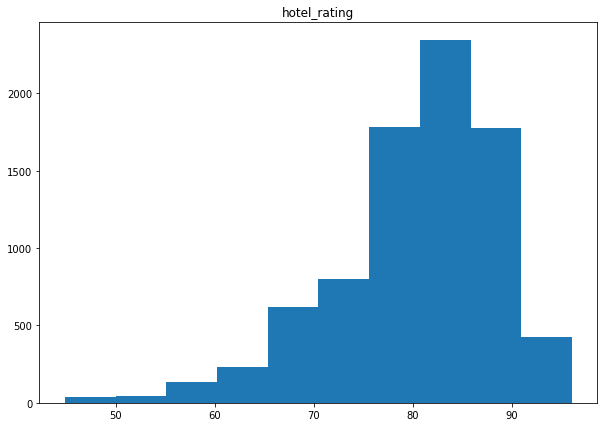

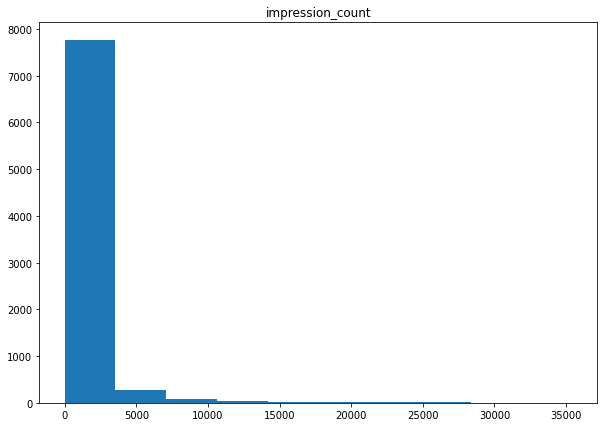

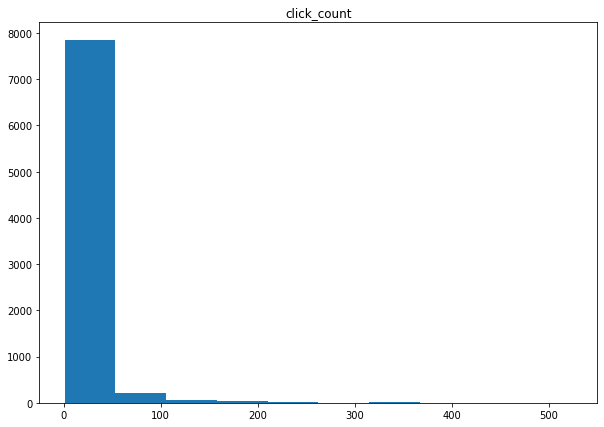

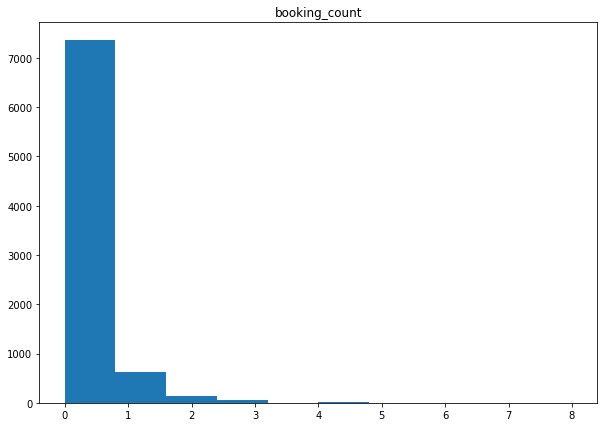

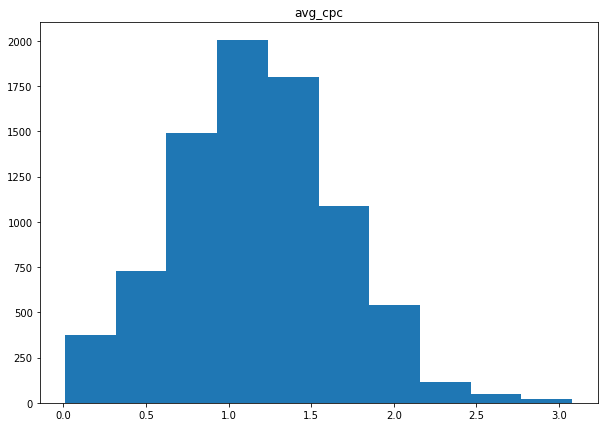

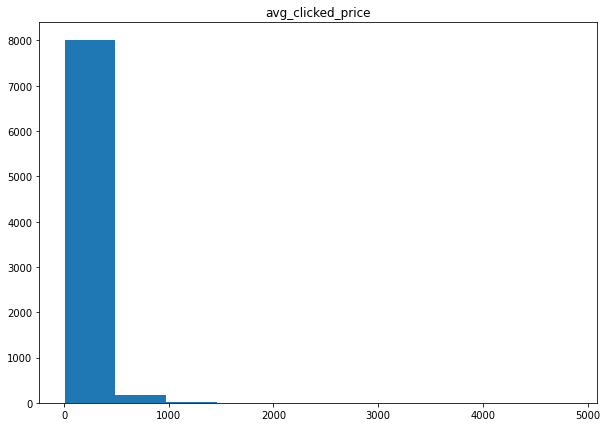

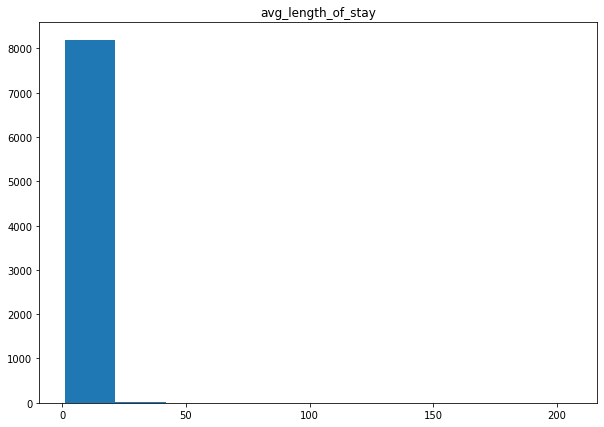

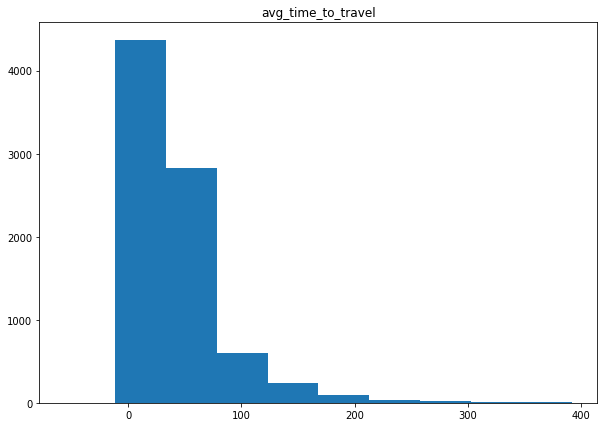

In [ ]:
for i in list_column:
  fig, ax = plt.subplots(figsize =(10, 7))
  ax.hist(data[i])
  plt.title(i)
  plt.show()

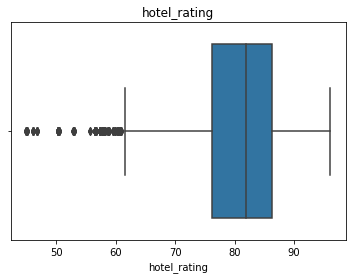

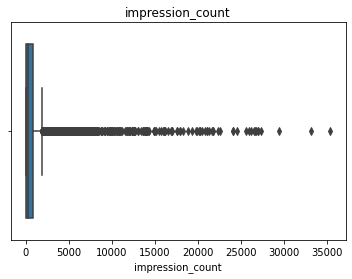

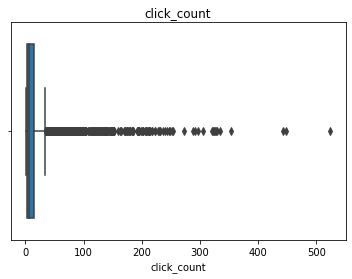

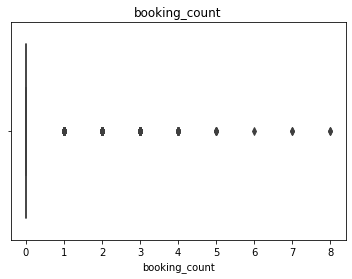

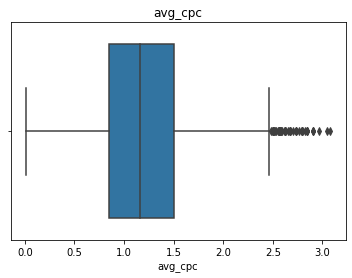

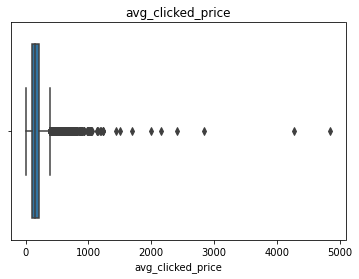

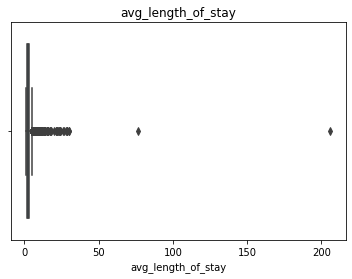

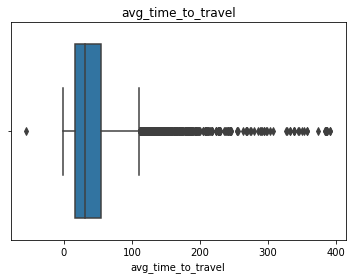

In [ ]:
for i in list_column:
  sns.boxplot(data[i]);plt.title(i);plt.show()

boxplot showing non outliers as outliers. so keeping the outliers 

Model Building

In [ ]:
# splitting the data into X and y
X = data.drop('city' , axis = 1)
y = pd.DataFrame(data['city'])

In [ ]:
# normalizing the data
# normalize
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
X.columns

Index(['stars', 'hotel_rating', 'impression_count', 'click_count',
       'booking_count', 'avg_cpc', 'avg_clicked_price', 'avg_length_of_stay',
       'avg_time_to_travel'],
      dtype='object')

In [ ]:
X = norm_func(X.iloc[:,1:])
X.columns

Index(['hotel_rating', 'impression_count', 'click_count', 'booking_count',
       'avg_cpc', 'avg_clicked_price', 'avg_length_of_stay',
       'avg_time_to_travel'],
      dtype='object')

In [ ]:
# concatinating 
X = pd.concat([X , data['stars']] , axis = 1)
X.columns

Index(['hotel_rating', 'impression_count', 'click_count', 'booking_count',
       'avg_cpc', 'avg_clicked_price', 'avg_length_of_stay',
       'avg_time_to_travel', 'stars'],
      dtype='object')

In [ ]:
# creating dummy variables 
X = pd.get_dummies(X)
X.columns

Index(['hotel_rating', 'impression_count', 'click_count', 'booking_count',
       'avg_cpc', 'avg_clicked_price', 'avg_length_of_stay',
       'avg_time_to_travel', 'stars_0', 'stars_1', 'stars_2', 'stars_3',
       'stars_4', 'stars_5'],
      dtype='object')

In [ ]:
# converting output varibles in label encoding 
# creating instance of labelencoder
labelencoder = LabelEncoder()
y['city'] = labelencoder.fit_transform(y['city'])
# 0 =Hanoi, 1 = Los angelos, 2 = miami, 3 = Newyork, 4 =Rio de janerio, 5 =stockholm

Model Building

In [ ]:
y = y.squeeze()

In [ ]:
pip install evalml

     |████████████████████████████████| 6.4 MB 3.5 MB/s 
     |████████████████████████████████| 26.5 MB 1.4 MB/s 
     |████████████████████████████████| 1.5 MB 50.0 MB/s 
     |████████████████████████████████| 15.7 MB 40.4 MB/s 
     |████████████████████████████████| 1.6 MB 52.9 MB/s 
     |████████████████████████████████| 11.2 MB 57.3 MB/s 
     |████████████████████████████████| 339 kB 76.6 MB/s 
     |████████████████████████████████| 275 kB 74.7 MB/s 
     |████████████████████████████████| 2.0 MB 51.8 MB/s 
     |████████████████████████████████| 11.3 MB 39.4 MB/s 
     |████████████████████████████████| 564 kB 58.0 MB/s 
     |████████████████████████████████| 76.1 MB 54 kB/s 
     |████████████████████████████████| 2.6 MB 42.4 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 160 kB 73.7 MB/s 
     |████████████████████████████████| 1.0 MB 76.6 MB/s 
     |████████████████████████████████| 18.0 MB 364 kB/s 
     |█████████

In [ ]:
import evalml

In [ ]:
from evalml.automl import AutoMLSearch

In [ ]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='multiclass')

In [ ]:
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='multiclass')
automl.search()

In [ ]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,4,LightGBM Classifier w/ Label Encoder + Imputer...,4,0.429760,0.021411,0.429760,97.508399,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,3,XGBoost Classifier w/ Label Encoder + Imputer ...,3,0.485662,0.004992,0.485662,97.184293,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,6,Random Forest Classifier w/ Label Encoder + Im...,6,0.853858,0.003519,0.853858,95.049618,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,2,Logistic Regression Classifier w/ Label Encode...,2,0.921572,0.018262,0.921572,94.657036,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,0.957461,0.008875,0.957461,94.448966,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,8,Extra Trees Classifier w/ Label Encoder + Impu...,8,1.207877,0.004484,1.207877,92.997135,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,7,Decision Tree Classifier w/ Label Encoder + Im...,7,1.271084,0.043077,1.271084,92.630683,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,5,CatBoost Classifier w/ Label Encoder + Imputer...,5,1.429504,0.002098,1.429504,91.712219,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,0,Mode Baseline Multiclass Classification Pipeline,0,17.248329,0.004555,17.248329,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [ ]:
automl.best_pipeline

pipeline = MulticlassClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Oversampler': ['Oversampler', 'Imputer.x', 'Label Encoder.y'], 'LightGBM Classifier': ['LightGBM Classifier', 'Oversampler.x', 'Oversampler.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Oversampler':{'sampling_ratio': 0.25, 'k_neighbors_default': 5, 'n_jobs': -1, 'sampling_ratio_dict': None, 'k_neighbors': 5}, 'LightGBM Classifier':{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 0, 'num_leaves': 31, 'min_child_samples': 20, 'n_jobs': -1, 'bagging_freq': 0, 'bagging_fraction': 0.9}}, random_seed=0)

In [ ]:
from evalml.pipelines import MulticlassClassificationPipeline
pipeline = automl.best_pipeline

In [ ]:
# return data table of best model bared on their accuracy
automl.best_pipeline
# storing datable in best_pipeline variable
best_pipeline = automl.best_pipeline

In [ ]:
'''it will give a entire description particular model here we are getting detailed description 
about our first model, we can change the index of id in below code and check detailed 
description about any of the model.'''

automl.describe_pipeline(automl.rankings.iloc[0]["id"])


****************************************************************
* LightGBM Classifier w/ Label Encoder + Imputer + Oversampler *
****************************************************************

Problem Type: multiclass
Model Family: LightGBM

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Oversampler
	 * sampling_ratio : 0.25
	 * k_neighbors_default : 5
	 * n_jobs : -1
	 * sampling_ratio_dict : None
	 * k_neighbors : 5
4. LightGBM Classifier
	 * boosting_type : gbdt
	 * learning_rate : 0.1
	 * n_estimators : 100
	 * max_depth : 0
	 * num_leaves : 31
	 * min_child_samples : 20
	 * n_jobs : -1
	 * bagging_freq : 0
	 * bagging_fraction : 0.9

Training
Training for multiclass problems.
Total training time (including CV): 4.3 seconds

Cross Validation
----------------
             Log Loss Multiclass  MCC Multiclass  A

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[1]["id"])


***************************************************************
* XGBoost Classifier w/ Label Encoder + Imputer + Oversampler *
***************************************************************

Problem Type: multiclass
Model Family: XGBoost

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Oversampler
	 * sampling_ratio : 0.25
	 * k_neighbors_default : 5
	 * n_jobs : -1
	 * sampling_ratio_dict : None
	 * k_neighbors : 5
4. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1
	 * eval_metric : logloss

Training
Training for multiclass problems.
Total training time (including CV): 15.7 seconds

Cross Validation
----------------
             Log Loss Multiclass  MCC Multiclass  AUC Weighted  AUC Macro  AUC Micro  Precision Weighted  Precision Macro  Precision M

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(boosting_type = 'gbdt', learning_rate=0.1, n_estimators = 100,max_depth = 0, num_leaves = 31,min_child_samples = 20, n_jobs=-1,bagging_freq=0,baggin_fraction = 0.9)
model.fit(X_train, y_train)

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# make predictions for train data
y_pred_train = model.predict(X_train)
predictions_train = [round(value) for value in y_pred_train]
# evaluate predictions
accuracy_train = accuracy_score(y_train, predictions_train)
print("Accuracy: %.2f%%" % (accuracy_train * 100.0))

Detailed discription of XGBoost Model

In [ ]:
pipeline.fit(X_train, y_train)

pipeline = MulticlassClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Oversampler': ['Oversampler', 'Imputer.x', 'Label Encoder.y'], 'LightGBM Classifier': ['LightGBM Classifier', 'Oversampler.x', 'Oversampler.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Oversampler':{'sampling_ratio': 0.25, 'k_neighbors_default': 5, 'n_jobs': -1, 'sampling_ratio_dict': None, 'k_neighbors': 5}, 'LightGBM Classifier':{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 0, 'num_leaves': 31, 'min_child_samples': 20, 'n_jobs': -1, 'bagging_freq': 0, 'bagging_fraction': 0.9}}, random_seed=0)

In [ ]:
#Predict and score the model
y_test_preds = pipeline.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.4674479238409246 on 1641 values.'

In [ ]:
# make predictions for test data
y_pred = pipeline.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 86.23%


In [ ]:
from sklearn.metrics import f1_score 
f1_score(y_test,predictions,average='macro')

0.811114959110832

Here We come to Conclusion of our model that the best algorithm is 
1)LightGBM Multiclass 2) XGBoost Multiclass 
b) with .81 f1 scores

In [ ]:
We can see that it is right fit model 

In the Below few lines just we are checking the utput values we are getting clean or not by few Preprocessing steps

In [ ]:
new_data = unknow_data.drop('hotel_id', axis=1)
new_data = new_data.drop('city', axis=1)
new_data = new_data.drop('date_ymd', axis=1)
new_data = new_data.reindex([ 'hotel_rating', 'impression_count', 'click_count',
       'booking_count', 'avg_cpc', 'avg_clicked_price', 'avg_length_of_stay',
       'avg_time_to_travel','stars'] , axis = 1)
## removing \\N values from the hotel_rating columns
new_data = pd.DataFrame(new_data[new_data['hotel_rating'] != '\\N'])
new_data['hotel_rating'] = new_data['hotel_rating'].astype('float64')
new_data['stars'] = new_data['stars'].astype('object')
new_data = pd.get_dummies(new_data)
new_data.head()

,hotel_rating,impression_count,click_count,booking_count,avg_cpc,avg_clicked_price,avg_length_of_stay,avg_time_to_travel,stars_0,stars_1,stars_2,stars_3,stars_4,stars_5
64,60.57,370,6,0,0.61,94.33,2.83,63.33,0,0,1,0,0,0
65,60.57,414,4,0,0.64,88.06,3.25,47.00,0,0,1,0,0,0
66,60.57,301,7,0,0.72,81.76,3.43,47.86,0,0,1,0,0,0
67,60.57,492,8,0,0.67,70.68,3.88,36.63,0,0,1,0,0,0
68,60.57,549,8,0,0.67,79.29,3.63,15.25,0,0,1,0,0,0


In [ ]:
new_data.isna().sum()

hotel_rating          0
impression_count      0
click_count           0
booking_count         0
avg_cpc               0
avg_clicked_price     0
avg_length_of_stay    0
avg_time_to_travel    0
stars_0               0
stars_1               0
stars_2               0
stars_3               0
stars_4               0
stars_5               0
dtype: int64

In [ ]:
predict = pipeline.predict(new_data.iloc[:,:])


In [ ]:
predict['city'] = pd.DataFrame(predict)


In [ ]:
predict['city']

,city
64,3
65,3
66,3
67,3
68,3
...,...
9561,3
9562,3
9563,3
9564,3


In [ ]:
output_data = pd.concat([new_data, predict] , axis = 1)
output_data.head()

,hotel_rating,impression_count,click_count,booking_count,avg_cpc,avg_clicked_price,avg_length_of_stay,avg_time_to_travel,stars_0,stars_1,stars_2,stars_3,stars_4,stars_5,city
64,60.57,370.0,6.0,0.0,0.61,94.33,2.83,63.33,0.0,0.0,1.0,0.0,0.0,0.0,3
65,60.57,414.0,4.0,0.0,0.64,88.06,3.25,47.00,0.0,0.0,1.0,0.0,0.0,0.0,3
66,60.57,301.0,7.0,0.0,0.72,81.76,3.43,47.86,0.0,0.0,1.0,0.0,0.0,0.0,3
67,60.57,492.0,8.0,0.0,0.67,70.68,3.88,36.63,0.0,0.0,1.0,0.0,0.0,0.0,3
68,60.57,549.0,8.0,0.0,0.67,79.29,3.63,15.25,0.0,0.0,1.0,0.0,0.0,0.0,3


In [ ]:
output_data.isna().sum()

hotel_rating          1
impression_count      1
click_count           1
booking_count         1
avg_cpc               1
avg_clicked_price     1
avg_length_of_stay    1
avg_time_to_travel    1
stars_0               1
stars_1               1
stars_2               1
stars_3               1
stars_4               1
stars_5               1
city                  0
dtype: int64

So the output result what we got is not having the null value. So we good to follow the Model for deployment.

We have done all things now its time to save the model in pickel file 

In [ ]:
# save model in model.pkl file.
best_pipeline.save("pipeline.pkl")

In [ ]:
# loading the model saved in pickel file
check_model = automl.load('pipeline.pkl')


In [ ]:

check_model

pipeline = MulticlassClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Oversampler': ['Oversampler', 'Imputer.x', 'Label Encoder.y'], 'LightGBM Classifier': ['LightGBM Classifier', 'Oversampler.x', 'Oversampler.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Oversampler':{'sampling_ratio': 0.25, 'k_neighbors_default': 5, 'n_jobs': -1, 'sampling_ratio_dict': None, 'k_neighbors': 5}, 'LightGBM Classifier':{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 0, 'num_leaves': 31, 'min_child_samples': 20, 'n_jobs': -1, 'bagging_freq': 0, 'bagging_fraction': 0.9}}, random_seed=0)